In [1]:
# !pip install scikit-learn==0.22.2.post1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.shape

(205, 26)

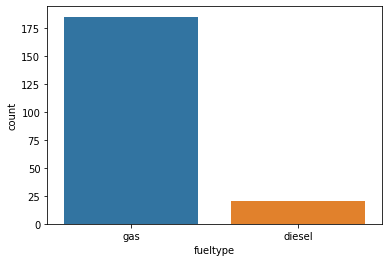

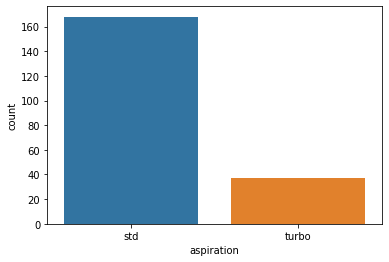

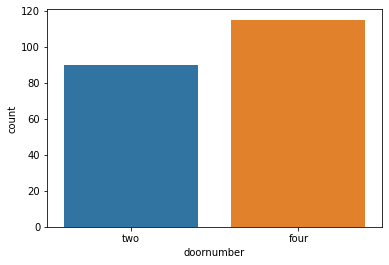

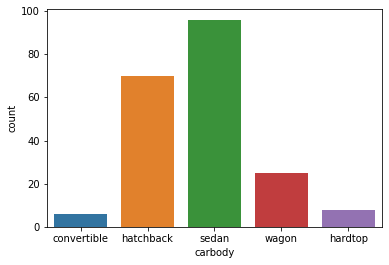

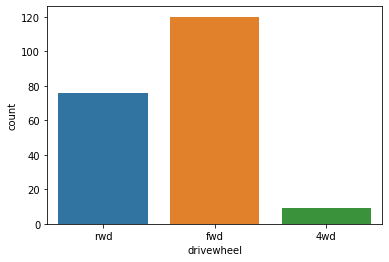

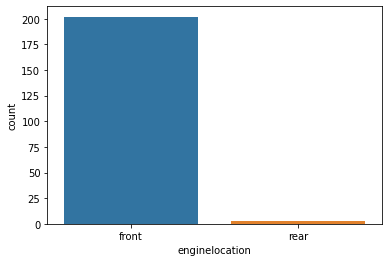

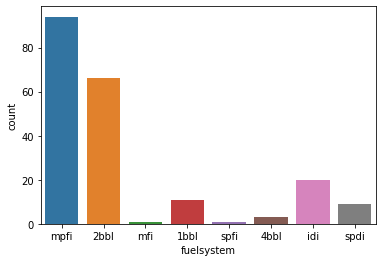

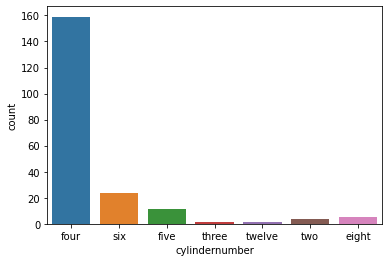

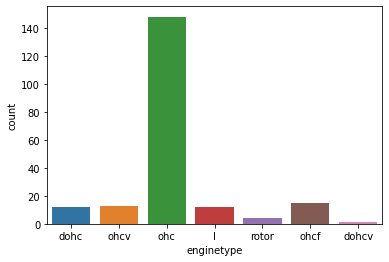

In [7]:
columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem','cylindernumber','enginetype']
for i in columns:
  sns.countplot(data=data,x=i)
  plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print("------------------------------------------------------")

car_ID
205    1
64     1
74     1
73     1
72     1
      ..
134    1
133    1
132    1
131    1
1      1
Name: car_ID, Length: 205, dtype: int64
------------------------------------------------------
symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
------------------------------------------------------
CarName
toyota corona                6
peugeot 504                  6
toyota corolla               6
subaru dl                    4
mazda 626                    3
                            ..
toyota celica gt liftback    1
jaguar xk                    1
toyota corona mark ii        1
nissan dayz                  1
vw dasher                    1
Name: CarName, Length: 147, dtype: int64
------------------------------------------------------
fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64
------------------------------------------------------
aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
----------------

In [10]:
columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem','cylindernumber','enginetype']
LE = LabelEncoder()
data[columns] = data[columns].apply(LE.fit_transform)

In [11]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [13]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
x=data.drop(['car_ID','symboling','price'],axis=1)

In [15]:
y=data['price']

In [16]:
x['CarName'].value_counts()

toyota corona                6
peugeot 504                  6
toyota corolla               6
subaru dl                    4
mazda 626                    3
                            ..
toyota celica gt liftback    1
jaguar xk                    1
toyota corona mark ii        1
nissan dayz                  1
vw dasher                    1
Name: CarName, Length: 147, dtype: int64

In [17]:
a = x['CarName'].to_numpy()
a
cars = ['alfa-romero','audi','bmw','chevrolet','dodge','honda','isuzu','jaguar','mazda','buick','mercury','mitsubishi','nissan','peugeot',
        'plymouth','porsche','renault','saab','subaru','toyota','volkswagen','volvo']


In [18]:
for i in cars:
  for j in range(len(a)):
    if i in a[j]:
      a[j] = i
    if 'maxda' in a[j]:
      a[j] = 'mazda'
    if 'vokswagen' in a[j] or 'vw' in a[j]:
      a[j] = 'volkswagen'
    if 'Nissan' in a[j]:
      a[j] = 'nissan'
    if 'porcshce' in a[j]:
      a[j] = 'porsche'
    if 'toyouta' in a[j]:
      a[j] = 'toyota'
a

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar',
       'jaguar', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick',
       'buick', 'isuzu', 'buick', 'buick', 'buick', 'mercury',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'nissan', 'nissan

In [19]:
x['CarName'] = a
x.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,alfa-romero,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,alfa-romero,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,alfa-romero,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,audi,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,audi,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22


In [20]:
dic = {
    'alfa-romero': 1,'audi': 2,'bmw': 3,'chevrolet': 4,'dodge': 5,'honda': 6,'isuzu': 7,'jaguar': 8,'mazda': 9,'buick': 10,'mercury': 11,'mitsubishi': 12,'nissan': 13,'peugeot': 14,
        'plymouth': 15,'porsche': 16,'renault': 17,'saab': 18,'subaru': 19,'toyota': 20,'volkswagen': 21,'volvo': 22
}
for i in range(len(a)):
  a[i] = dic[a[i]]
a

array([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
       7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 10, 10, 10, 10, 7, 10, 10, 10, 11, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 18, 18,
       18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22], dtype=object)

In [21]:
x['CarName'] = a
x.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22


In [22]:
from sklearn.feature_selection import SelectKBest,f_regression

In [23]:
fs=SelectKBest(score_func=f_regression,k=22)
final=fs.fit(x,y)
final

SelectKBest(k=22, score_func=<function f_regression at 0x7faa2e4b7f80>)

In [24]:
final.scores_

array([5.31979539e+00, 2.29274074e+00, 6.63662197e+00, 2.05946006e-01,
       1.44170547e+00, 1.01838772e+02, 2.39697401e+01, 1.01745716e+02,
       1.77420344e+02, 2.76423646e+02, 2.93271560e+00, 4.68594431e+02,
       4.92000178e-01, 1.55068004e-01, 6.57640421e+02, 7.79853600e+01,
       8.95074701e+01, 1.28931143e+00, 9.42573027e-01, 3.82163409e+02,
       1.48671801e+00, 1.80203163e+02, 1.92437464e+02])

In [25]:
scores=pd.DataFrame(final.scores_,columns=['scores'])
columns=pd.DataFrame(x.columns,columns=['columns'])
scores=pd.concat([scores,columns],axis=1)
scores

,scores,columns
0,5.319795,CarName
1,2.292741,fueltype
2,6.636622,aspiration
3,0.205946,doornumber
4,1.441705,carbody
5,101.838772,drivewheel
6,23.969740,enginelocation
7,101.745716,wheelbase
8,177.420344,carlength
9,276.423646,carwidth


In [26]:
result=scores.nlargest(15,columns='scores')
result1=list(result['columns'].values)
result1

['enginesize',
 'curbweight',
 'horsepower',
 'carwidth',
 'highwaympg',
 'citympg',
 'carlength',
 'drivewheel',
 'wheelbase',
 'boreratio',
 'fuelsystem',
 'enginelocation',
 'aspiration',
 'CarName',
 'carheight']

In [27]:
remaining= list(set(x.columns)-set(result1))
x=x.drop(remaining,axis=1)
x.head()

,CarName,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,21,27
1,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,21,27
2,1,0,2,0,94.5,171.2,65.5,52.4,2823,152,5,2.68,154,19,26
3,2,0,1,0,99.8,176.6,66.2,54.3,2337,109,5,3.19,102,24,30
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,136,5,3.19,115,18,22


In [28]:
# from sklearn.preprocessing import StandardScaler

In [29]:
# scaler = StandardScaler()
# s = scaler.fit_transform(x)
# x = pd.DataFrame(s,columns = x.columns)
# x

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
x.head()

,CarName,aspiration,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,21,27
1,1,0,2,0,88.6,168.8,64.1,48.8,2548,130,5,3.47,111,21,27
2,1,0,2,0,94.5,171.2,65.5,52.4,2823,152,5,2.68,154,19,26
3,2,0,1,0,99.8,176.6,66.2,54.3,2337,109,5,3.19,102,24,30
4,2,0,0,0,99.4,176.6,66.4,54.3,2824,136,5,3.19,115,18,22


In [33]:
model=LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print(model.coef_)

[-1.41001241e+02 -1.05447202e+02  1.28755058e+03  1.51218437e+04
  6.24246233e-02 -4.41451432e+01  1.05166666e+03  1.90001155e+02
  2.61883188e+00  6.53610093e+01  7.85311739e+01 -1.02927222e+03
  2.20876301e+01  1.60723512e+01 -6.29420799e+01]


In [36]:
print(model.intercept_)

-71375.73087348687


In [37]:
pd.DataFrame(model.coef_,x.columns,columns = ['Coeff'])

,Coeff
CarName,-141.001241
aspiration,-105.447202
drivewheel,1287.550577
enginelocation,15121.843681
wheelbase,0.062425
carlength,-44.145143
carwidth,1051.666659
carheight,190.001155
curbweight,2.618832
enginesize,65.361009


In [38]:
prediction=model.predict(x_test)

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [40]:
mean_absolute_error(y_test,prediction)

2369.9470412086125

In [41]:
mean_squared_error(y_test,prediction)

11988139.03323902

In [42]:
np.sqrt(mean_squared_error(y_test,prediction))

3462.3892088035136

In [43]:
print(model.score(x_test,y_test))

0.8481437998767032


In [44]:
import pickle
pickle.dump(model,open("car_pred.pkl","wb"))